In [63]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns

# Basic Analysis
In this notebooke I start with the dataset that resulted from the `data-cleaning.ipynb`.  I try to find relationships between the all the variables but most importantly USER_SUBSCRIPTION_STATUS.  The subsections are:
- Numeric Variable Relationships 
- Categorical Relationships
- Outlier Effect on Relationships

In [64]:
df = pd.read_csv('dw-ds-takehome-dataset-cleaned.csv')
df.set_index('USER_ID', inplace=True)
print(df.shape)
df.head()

(500000, 17)


,USER_SUBSCRIPTION_STATUS,N_TEAM_ASSOCIATIONS,TEAM_AGE_GROUPS,TEAM_COMPETITION_LEVELS,TEAM_ROLES,TEAM_SPORTS,N_TEAM_GAMES_SCORED,N_TEAM_VIDEOS_STREAMED,N_GAMES_SCORED_BY_USER,N_GAMES_STREAMED_BY_USER,N_DAYS_USER_ACTIVE,N_TEAM_ASSOCIATIONS_POWER_USER,N_TEAM_GAMES_SCORED_POWER_USER,N_TEAM_VIDEOS_STREAMED_POWER_USER,N_GAMES_SCORED_BY_USER_POWER_USER,N_GAMES_STREAMED_BY_USER_POWER_USER,N_DAYS_USER_ACTIVE_POWER_USER
USER_ID,,,,,,,,,,,,,,,,,
1,1,16.0,"['Between 13 - 18', 'Under 13']","['school', 'club_travel', 'recreational']","['family', 'fan', 'manager']",['baseball'],350.0,236.0,1.0,5.0,1124.0,1,1,1,0,0,1
2,0,0.0,[],[],[],[],0.0,0.0,0.0,0.0,49.0,0,0,0,0,0,0
3,0,2.0,['Between 13 - 18'],['club_travel'],"['fan', 'family']",['softball'],1.0,0.0,0.0,0.0,374.0,0,0,0,0,0,0
4,1,235.0,"['Under 13', 'Between 13 - 18']","['club_travel', 'recreational', 'school']","['family', 'manager', 'fan']","['baseball', 'soccer']",7312.0,2299.0,41.0,0.0,1010.0,1,1,1,0,0,0
5,0,11.0,['Under 13'],['club_travel'],"['family', 'fan', 'admin']","['baseball', 'softball']",125.0,0.0,0.0,0.0,658.0,0,0,0,0,0,0


In [65]:
df.columns

Index(['USER_SUBSCRIPTION_STATUS', 'N_TEAM_ASSOCIATIONS', 'TEAM_AGE_GROUPS',
       'TEAM_COMPETITION_LEVELS', 'TEAM_ROLES', 'TEAM_SPORTS',
       'N_TEAM_GAMES_SCORED', 'N_TEAM_VIDEOS_STREAMED',
       'N_GAMES_SCORED_BY_USER', 'N_GAMES_STREAMED_BY_USER',
       'N_DAYS_USER_ACTIVE', 'N_TEAM_ASSOCIATIONS_POWER_USER',
       'N_TEAM_GAMES_SCORED_POWER_USER', 'N_TEAM_VIDEOS_STREAMED_POWER_USER',
       'N_GAMES_SCORED_BY_USER_POWER_USER',
       'N_GAMES_STREAMED_BY_USER_POWER_USER', 'N_DAYS_USER_ACTIVE_POWER_USER'],
      dtype='object')

In [66]:
def correlation_matrix(df, chart_name):
    cols = df.columns
    # Compute correlation matrix
    corr_matrix = df[cols].astype(float).corr()

    # Plot correlation matrix
    plt.figure(figsize=(10, 8))
    im = plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
    plt.colorbar(im, fraction=0.046, pad=0.04)
    plt.xticks(range(len(cols)), cols, rotation=90)
    plt.yticks(range(len(cols)), cols)
    plt.title(f'Correlation Matrix of {chart_name} Columns')
    plt.tight_layout()
    plt.show()

## Numeric Correlations

In [67]:
# full numeric cols 
full_num_cols = ['USER_SUBSCRIPTION_STATUS', 'N_TEAM_ASSOCIATIONS', 'N_TEAM_GAMES_SCORED', 'N_TEAM_VIDEOS_STREAMED', 'N_GAMES_SCORED_BY_USER', 'N_GAMES_STREAMED_BY_USER', 'N_DAYS_USER_ACTIVE']
full_num_df = df[full_num_cols]
print(full_num_df.shape)
full_num_df.head()

(500000, 7)


,USER_SUBSCRIPTION_STATUS,N_TEAM_ASSOCIATIONS,N_TEAM_GAMES_SCORED,N_TEAM_VIDEOS_STREAMED,N_GAMES_SCORED_BY_USER,N_GAMES_STREAMED_BY_USER,N_DAYS_USER_ACTIVE
USER_ID,,,,,,,
1,1,16.0,350.0,236.0,1.0,5.0,1124.0
2,0,0.0,0.0,0.0,0.0,0.0,49.0
3,0,2.0,1.0,0.0,0.0,0.0,374.0
4,1,235.0,7312.0,2299.0,41.0,0.0,1010.0
5,0,11.0,125.0,0.0,0.0,0.0,658.0


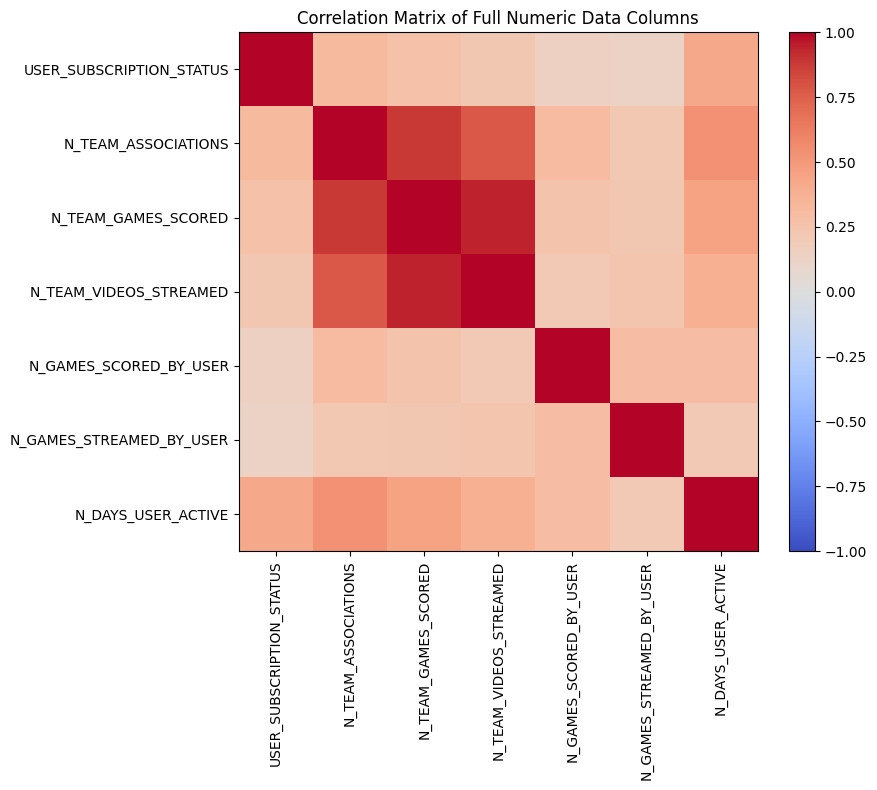

In [68]:
correlation_matrix(full_num_df, 'Full Numeric Data')

Based on the above most variables have little relationship to the target except N_DAYS_USER_ACTIVE.  N_DAYS_USER_ACTIVE also seems to be related to the others as well.  Might have a chain reaction variable set. Num Days -> More activity generally -> more likely to sub.

In [69]:
# numeric cols without outliers
whole_no_outliers_df = df[df['N_TEAM_ASSOCIATIONS_POWER_USER'] == 0]
whole_no_outliers_df = whole_no_outliers_df[whole_no_outliers_df['N_TEAM_GAMES_SCORED_POWER_USER'] == 0]
whole_no_outliers_df = whole_no_outliers_df[whole_no_outliers_df['N_TEAM_VIDEOS_STREAMED_POWER_USER'] == 0]
whole_no_outliers_df = whole_no_outliers_df[whole_no_outliers_df['N_GAMES_SCORED_BY_USER_POWER_USER'] == 0]
whole_no_outliers_df = whole_no_outliers_df[whole_no_outliers_df['N_GAMES_STREAMED_BY_USER_POWER_USER'] == 0]
whole_no_outliers_df = whole_no_outliers_df[whole_no_outliers_df['N_DAYS_USER_ACTIVE_POWER_USER'] == 0]
no_outliers_df = whole_no_outliers_df[full_num_cols]
print(no_outliers_df.shape)
no_outliers_df.head()

(421880, 7)


,USER_SUBSCRIPTION_STATUS,N_TEAM_ASSOCIATIONS,N_TEAM_GAMES_SCORED,N_TEAM_VIDEOS_STREAMED,N_GAMES_SCORED_BY_USER,N_GAMES_STREAMED_BY_USER,N_DAYS_USER_ACTIVE
USER_ID,,,,,,,
2,0,0.0,0.0,0.0,0.0,0.0,49.0
3,0,2.0,1.0,0.0,0.0,0.0,374.0
5,0,11.0,125.0,0.0,0.0,0.0,658.0
6,0,3.0,30.0,0.0,0.0,0.0,85.0
7,0,0.0,0.0,0.0,0.0,0.0,8.0


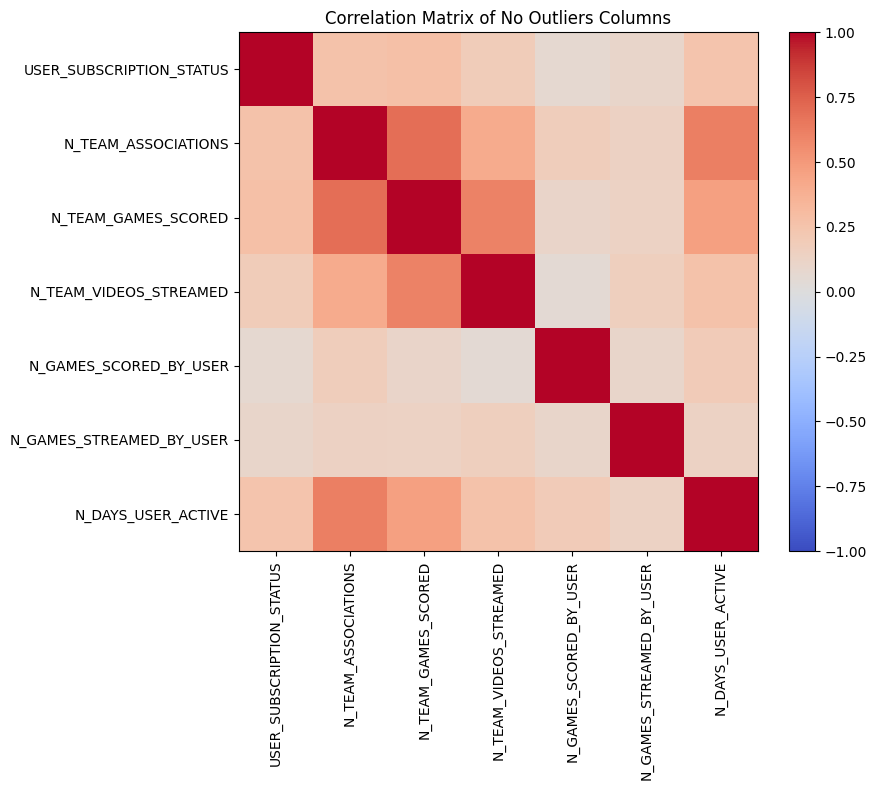

In [70]:
correlation_matrix(no_outliers_df, 'No Outliers')

Similar trend but the relationships have turned down down a bit. Possible idea: build a dimention reduced model of all 'team' variables or activity more generally.

## Unpack List Columns

In [71]:
list_cols = ['TEAM_AGE_GROUPS', 'TEAM_COMPETITION_LEVELS', 'TEAM_ROLES', 'TEAM_SPORTS']

# Convert string representations of lists to actual lists
for col in list_cols:
    df[col] = df[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [ ]:
# make sure the lists are unpacked
len(df.loc[1, 'TEAM_AGE_GROUPS'])

2

In [73]:
df_lists = df[list_cols]
print(df_lists.shape)
df_lists.head()

(500000, 4)


,TEAM_AGE_GROUPS,TEAM_COMPETITION_LEVELS,TEAM_ROLES,TEAM_SPORTS
USER_ID,,,,
1,"[Between 13 - 18, Under 13]","[school, club_travel, recreational]","[family, fan, manager]",[baseball]
2,[],[],[],[]
3,[Between 13 - 18],[club_travel],"[fan, family]",[softball]
4,"[Under 13, Between 13 - 18]","[club_travel, recreational, school]","[family, manager, fan]","[baseball, soccer]"
5,[Under 13],[club_travel],"[family, fan, admin]","[baseball, softball]"


In [ ]:
# convert the lists to a row for each list item
exploded_df = df_lists[['TEAM_AGE_GROUPS']].explode('TEAM_AGE_GROUPS')
for col in list_cols[1:]: 
    loop_df = df_lists[[col]].explode(col)
    exploded_df = pd.merge(exploded_df, loop_df, on='USER_ID', how='left')
print(exploded_df.shape)
exploded_df.head()

(2793942, 4)


,TEAM_AGE_GROUPS,TEAM_COMPETITION_LEVELS,TEAM_ROLES,TEAM_SPORTS
USER_ID,,,,
1,Between 13 - 18,school,family,baseball
1,Between 13 - 18,school,fan,baseball
1,Between 13 - 18,school,manager,baseball
1,Between 13 - 18,club_travel,family,baseball
1,Between 13 - 18,club_travel,fan,baseball


In [75]:
def plot_category_count_bar(df, cat_col):
    avg_df = df.groupby(cat_col).size().sort_values(ascending=False)
    ax = avg_df.plot(kind='bar', figsize=(10,6))
    ax.set_ylabel(f'Count')
    ax.set_title(f'Count by {cat_col}')
    ax.grid(axis='y')
    plt.show()

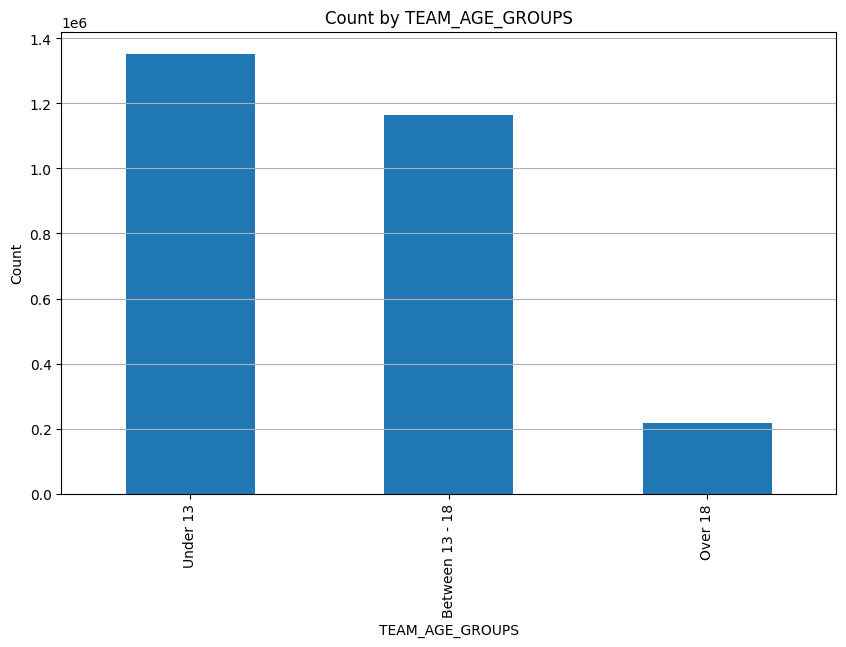

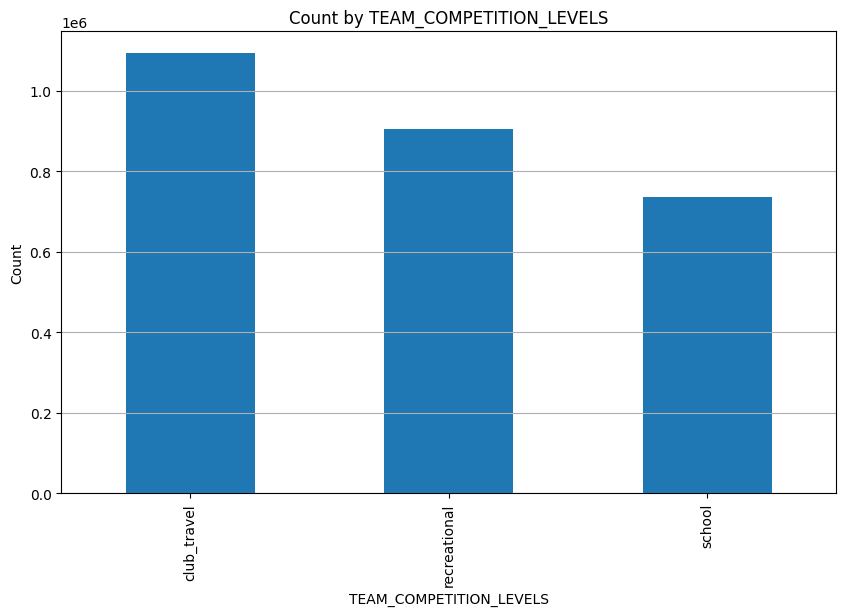

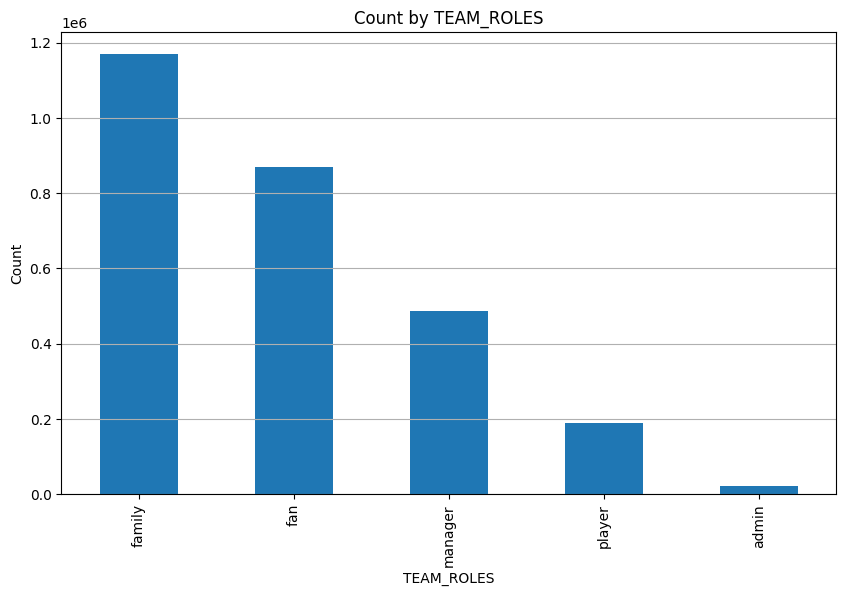

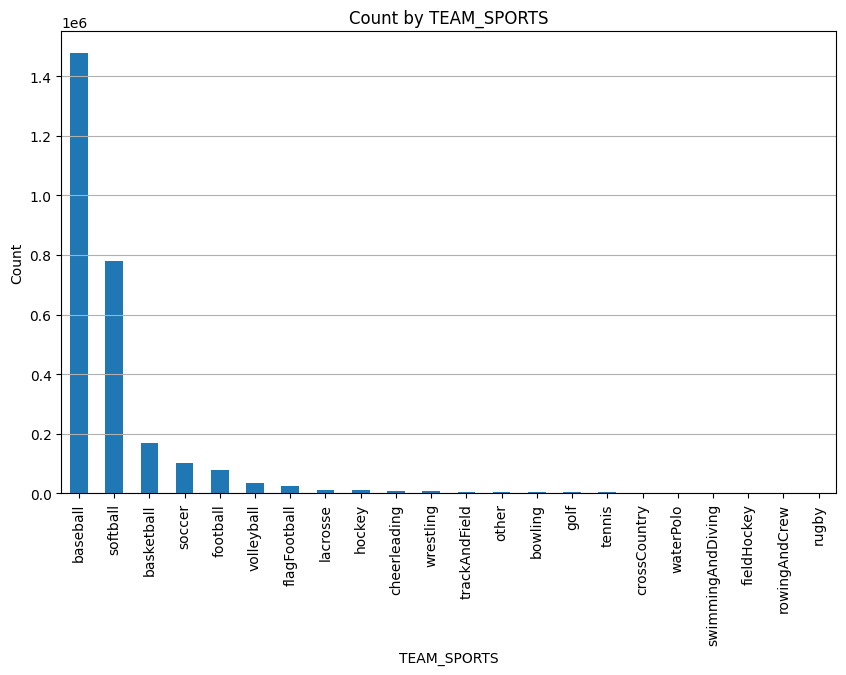

In [95]:
# plot the count of each list item to understand the distribution
for cat_col in list_cols:
    plot_category_count_bar(exploded_df, cat_col)

In [77]:
# join numeric cols
explod_full_num_df = pd.merge(exploded_df, full_num_df, on='USER_ID', how='left')
print(explod_full_num_df.shape)
explod_full_num_df.head()

(2793942, 11)


,TEAM_AGE_GROUPS,TEAM_COMPETITION_LEVELS,TEAM_ROLES,TEAM_SPORTS,USER_SUBSCRIPTION_STATUS,N_TEAM_ASSOCIATIONS,N_TEAM_GAMES_SCORED,N_TEAM_VIDEOS_STREAMED,N_GAMES_SCORED_BY_USER,N_GAMES_STREAMED_BY_USER,N_DAYS_USER_ACTIVE
USER_ID,,,,,,,,,,,
1,Between 13 - 18,school,family,baseball,1,16.0,350.0,236.0,1.0,5.0,1124.0
1,Between 13 - 18,school,fan,baseball,1,16.0,350.0,236.0,1.0,5.0,1124.0
1,Between 13 - 18,school,manager,baseball,1,16.0,350.0,236.0,1.0,5.0,1124.0
1,Between 13 - 18,club_travel,family,baseball,1,16.0,350.0,236.0,1.0,5.0,1124.0
1,Between 13 - 18,club_travel,fan,baseball,1,16.0,350.0,236.0,1.0,5.0,1124.0


In [78]:
# join none outlier cols
explod_no_outliers_df = pd.merge(exploded_df, no_outliers_df, on='USER_ID', how='left')
explod_no_outliers_df.dropna(inplace=True)
print(explod_no_outliers_df.shape)
explod_no_outliers_df.head()

(1311883, 11)


,TEAM_AGE_GROUPS,TEAM_COMPETITION_LEVELS,TEAM_ROLES,TEAM_SPORTS,USER_SUBSCRIPTION_STATUS,N_TEAM_ASSOCIATIONS,N_TEAM_GAMES_SCORED,N_TEAM_VIDEOS_STREAMED,N_GAMES_SCORED_BY_USER,N_GAMES_STREAMED_BY_USER,N_DAYS_USER_ACTIVE
USER_ID,,,,,,,,,,,
3,Between 13 - 18,club_travel,fan,softball,0.0,2.0,1.0,0.0,0.0,0.0,374.0
3,Between 13 - 18,club_travel,family,softball,0.0,2.0,1.0,0.0,0.0,0.0,374.0
5,Under 13,club_travel,family,baseball,0.0,11.0,125.0,0.0,0.0,0.0,658.0
5,Under 13,club_travel,family,softball,0.0,11.0,125.0,0.0,0.0,0.0,658.0
5,Under 13,club_travel,fan,baseball,0.0,11.0,125.0,0.0,0.0,0.0,658.0


In [79]:
def plot_category_avg_bar(cat_col, num_col):
    # Compute averages for both datasets and add a column to indicate the data source
    efn_avg_df = explod_full_num_df.groupby(cat_col)[num_col].mean().reset_index()
    efn_avg_df['Data'] = 'All Data'
    eno_avg_df = explod_no_outliers_df.groupby(cat_col)[num_col].mean().reset_index()
    eno_avg_df['Data'] = 'No Outliers'
    
    # Combine both DataFrames
    combined_avg_df = pd.concat([efn_avg_df, eno_avg_df], ignore_index=True)
    
    # Plot side-by-side bars for comparison
    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=combined_avg_df,
        x=cat_col,
        y=num_col,
        hue='Data'
    )
    plt.ylabel(f'Average {num_col}')
    plt.title(f'Average {num_col} by {cat_col} (All Data vs No Outliers)')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

Are outliers causing relationship changes between categorical variables?

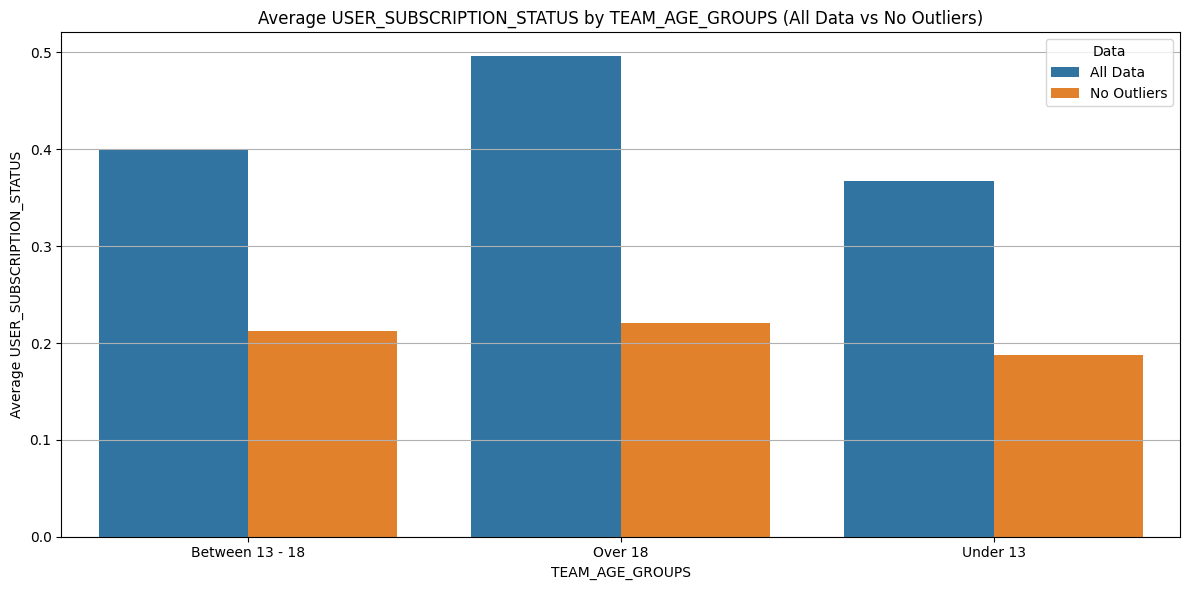

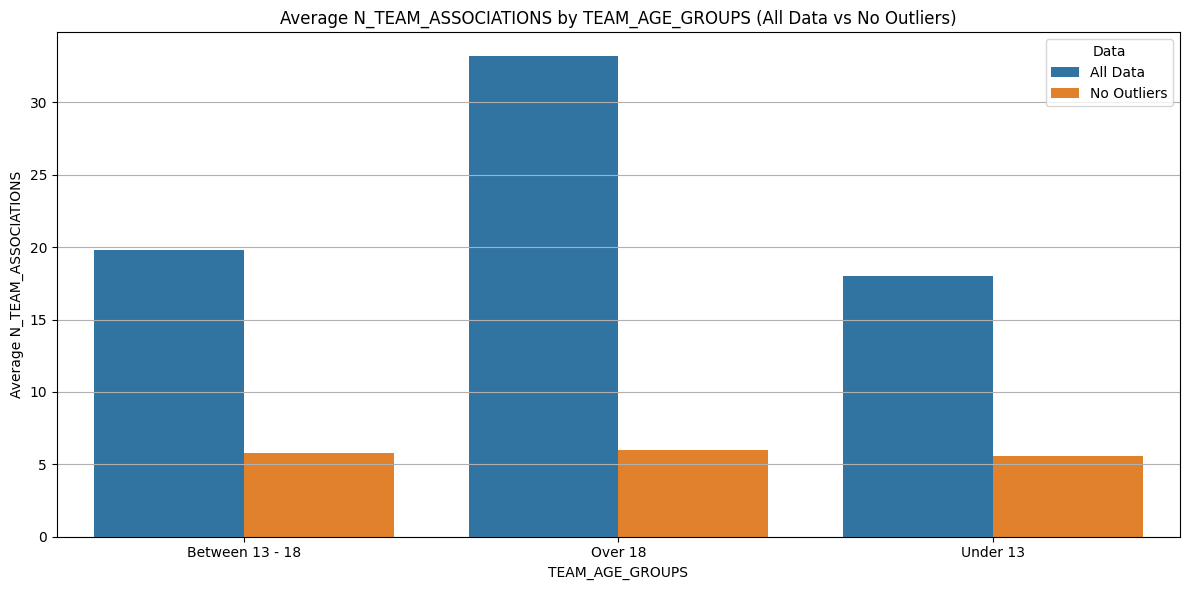

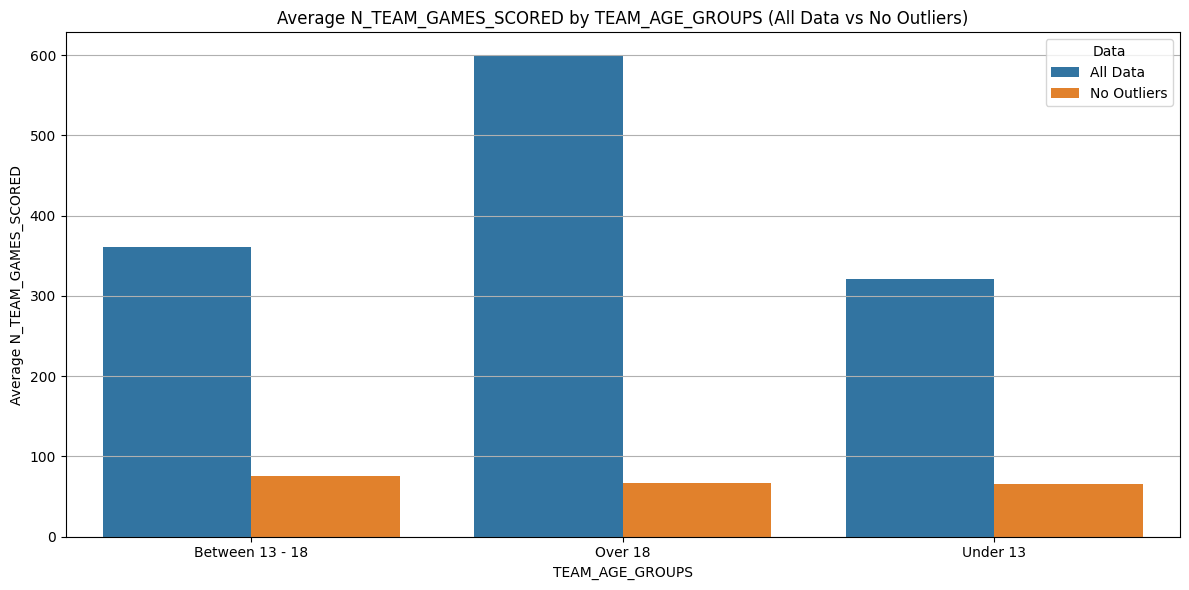

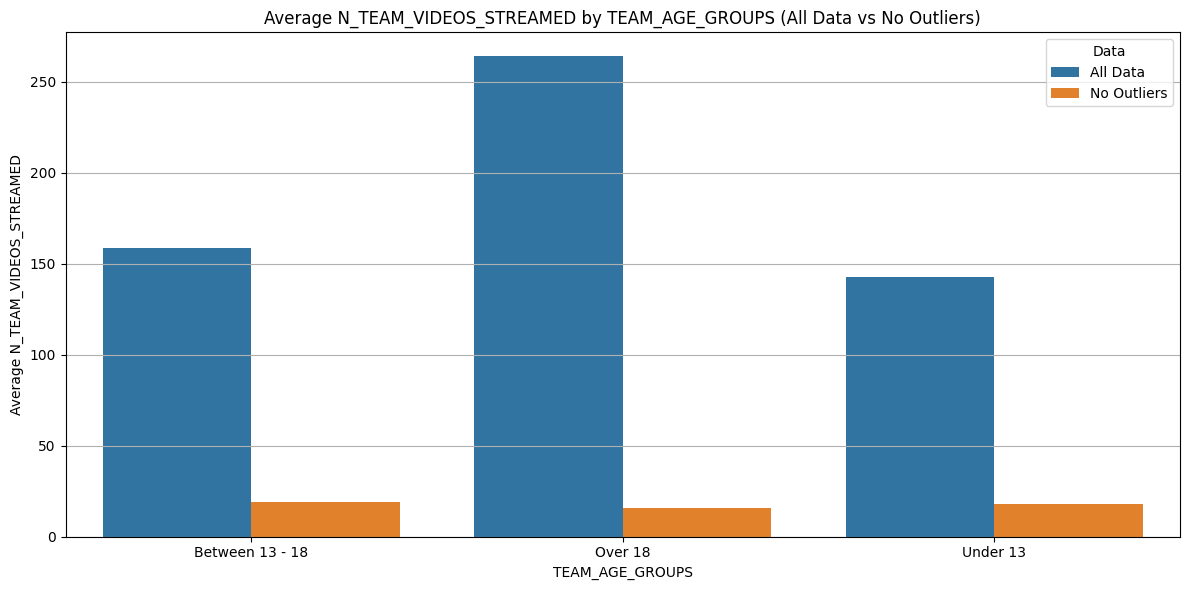

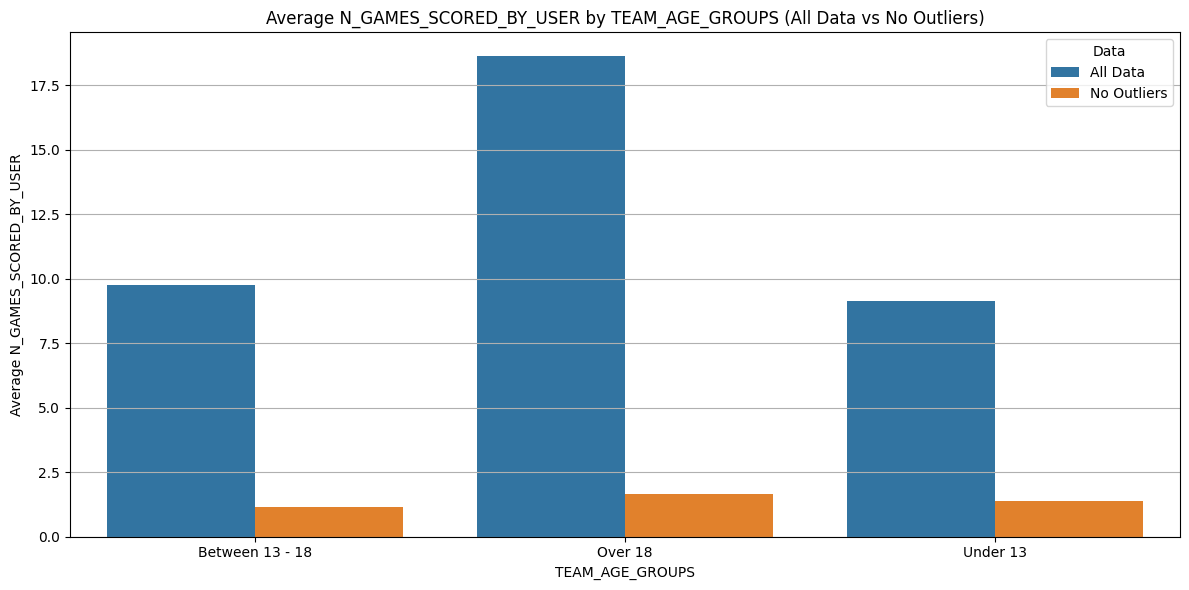

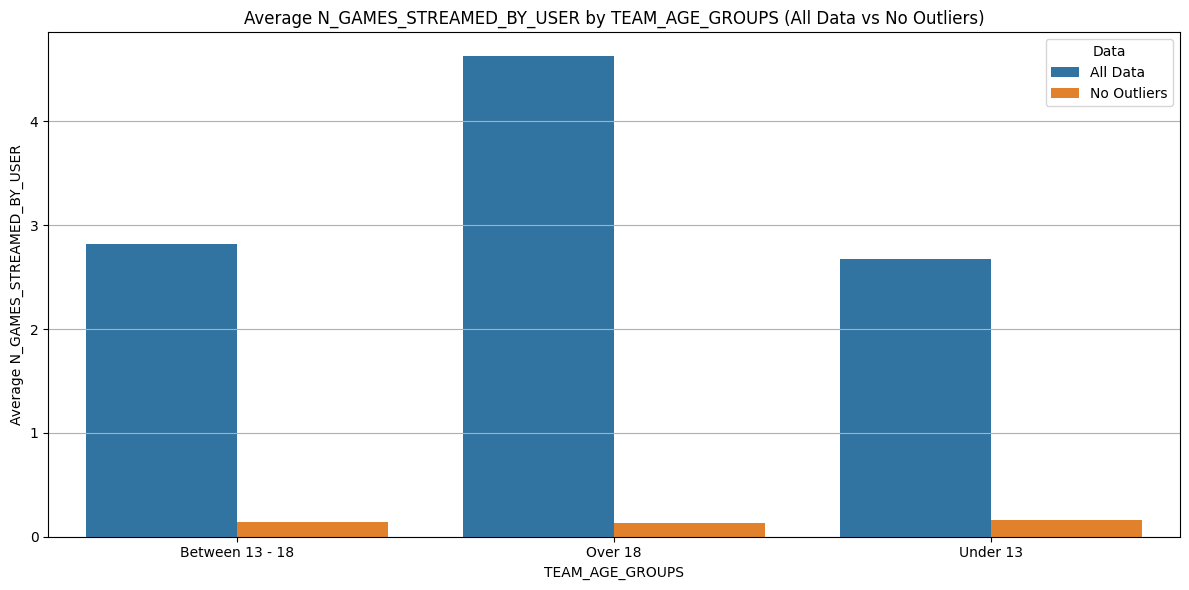

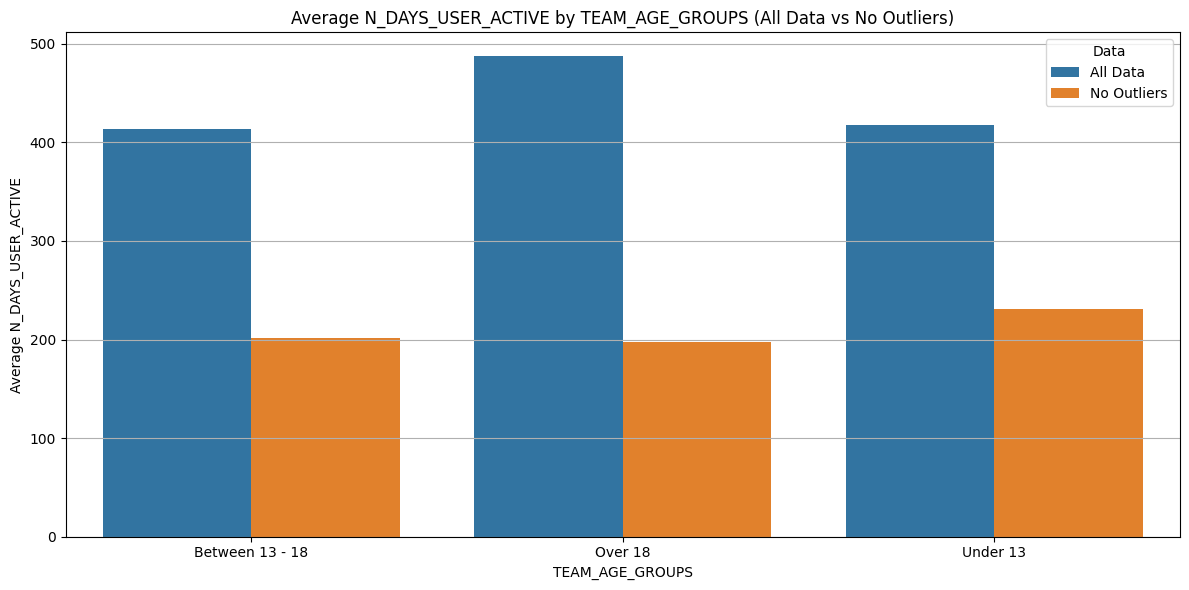

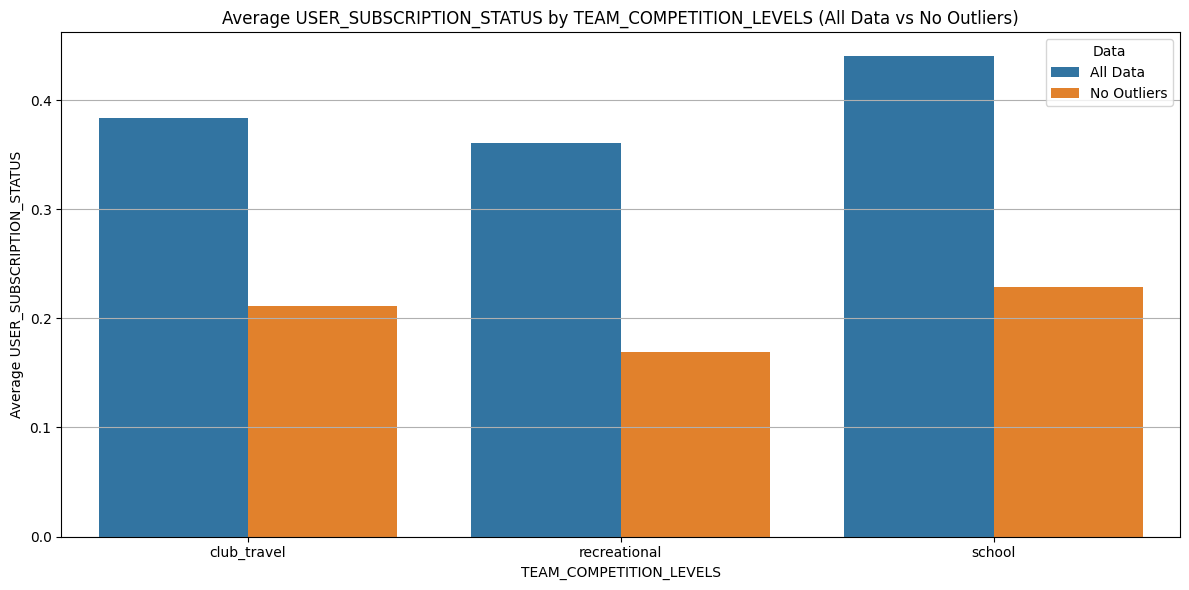

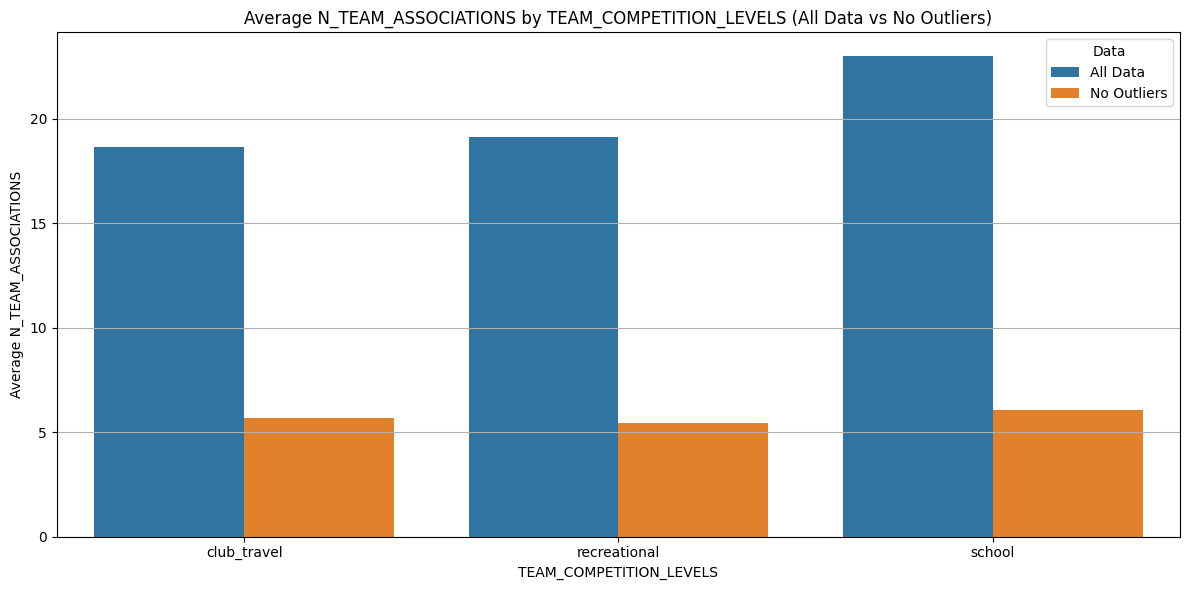

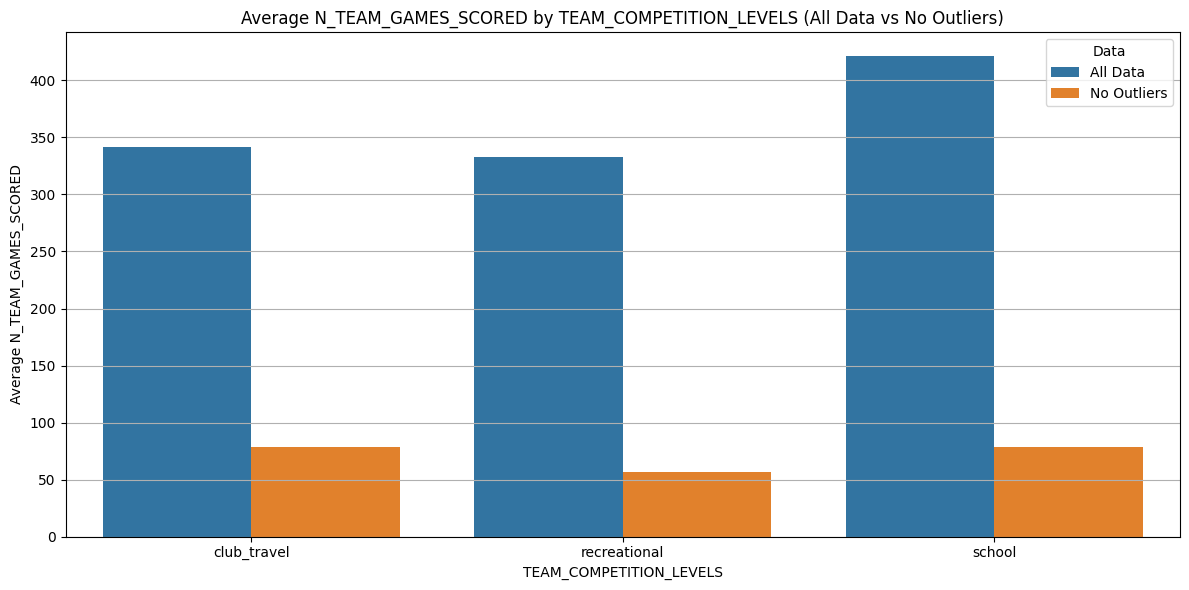

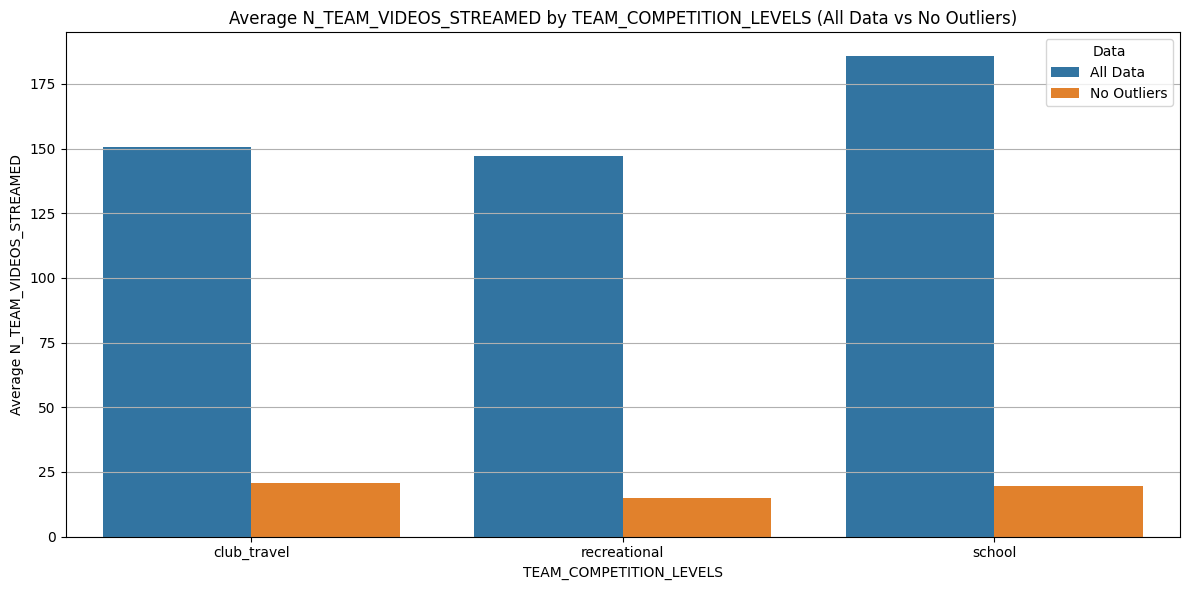

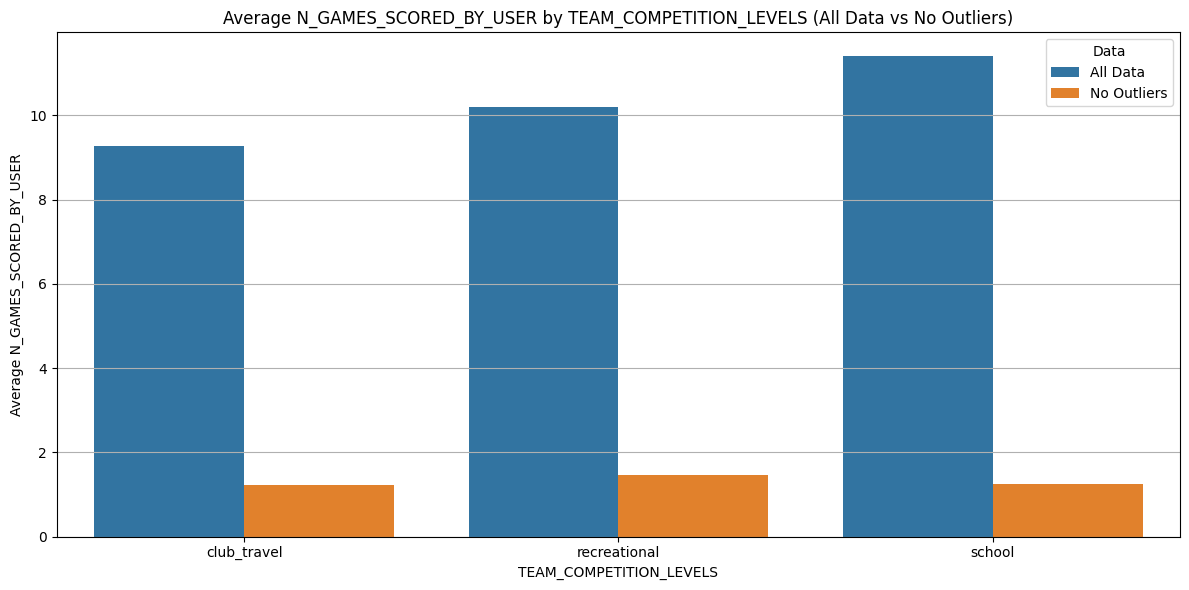

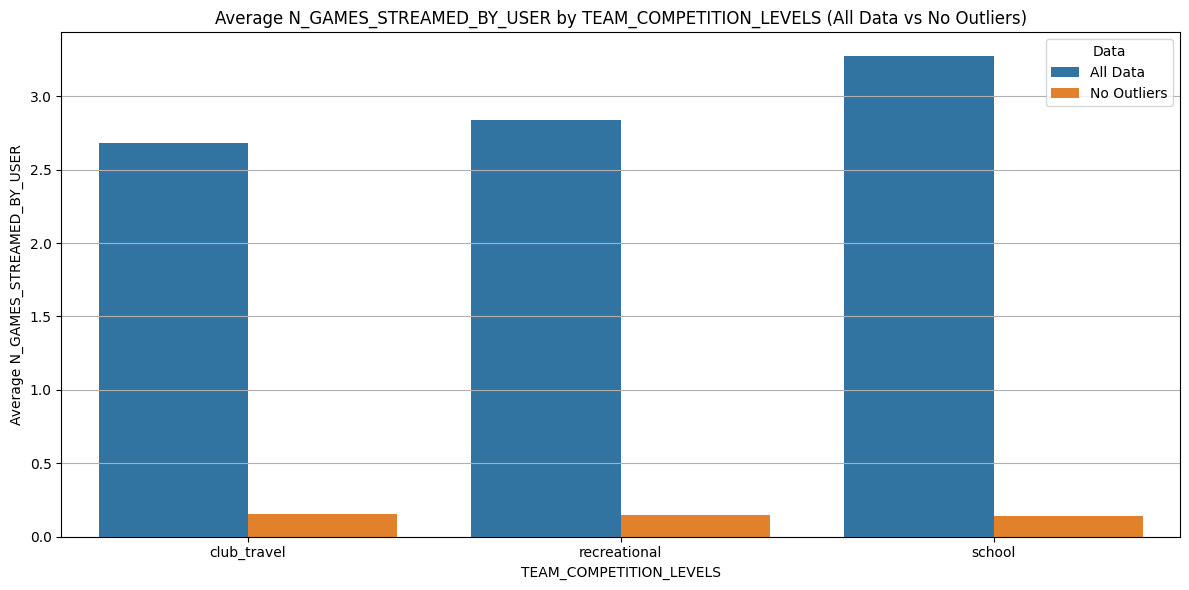

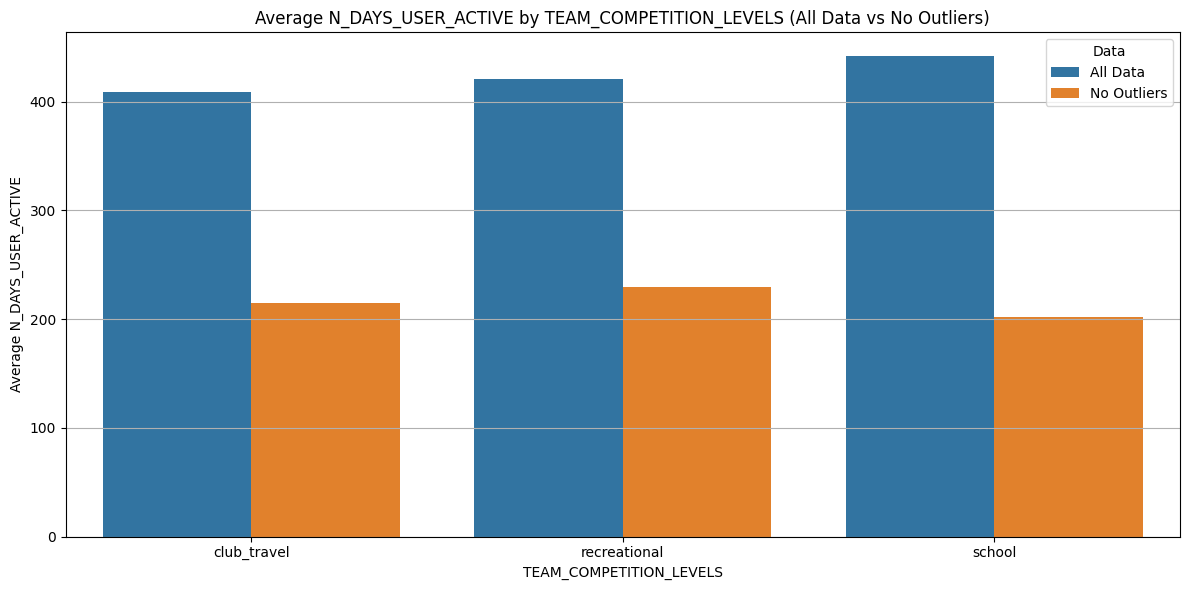

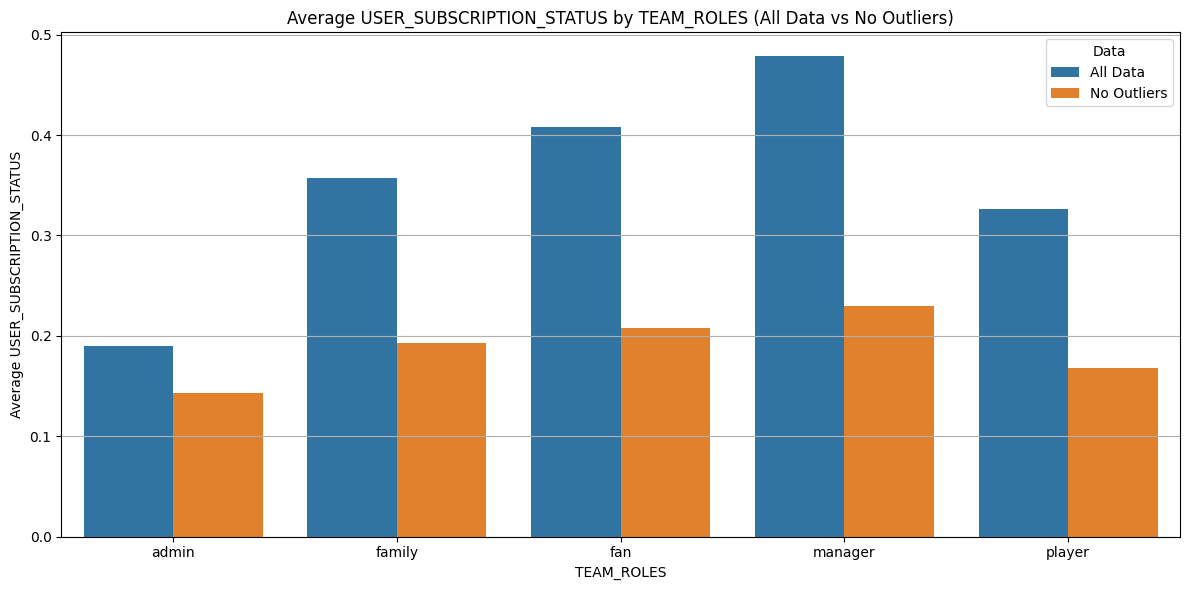

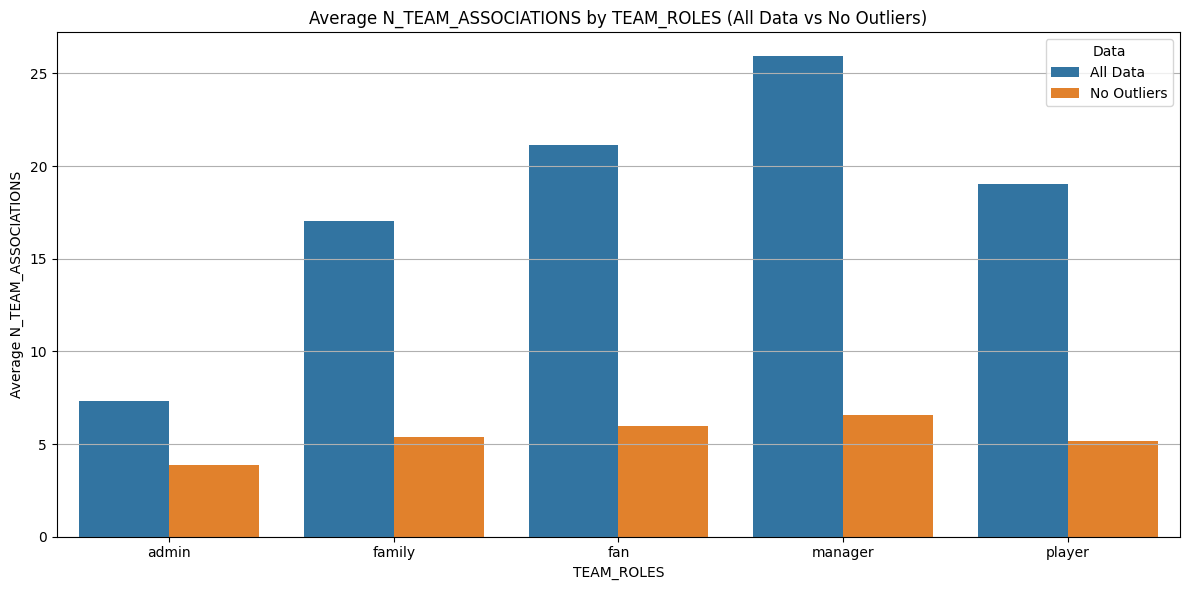

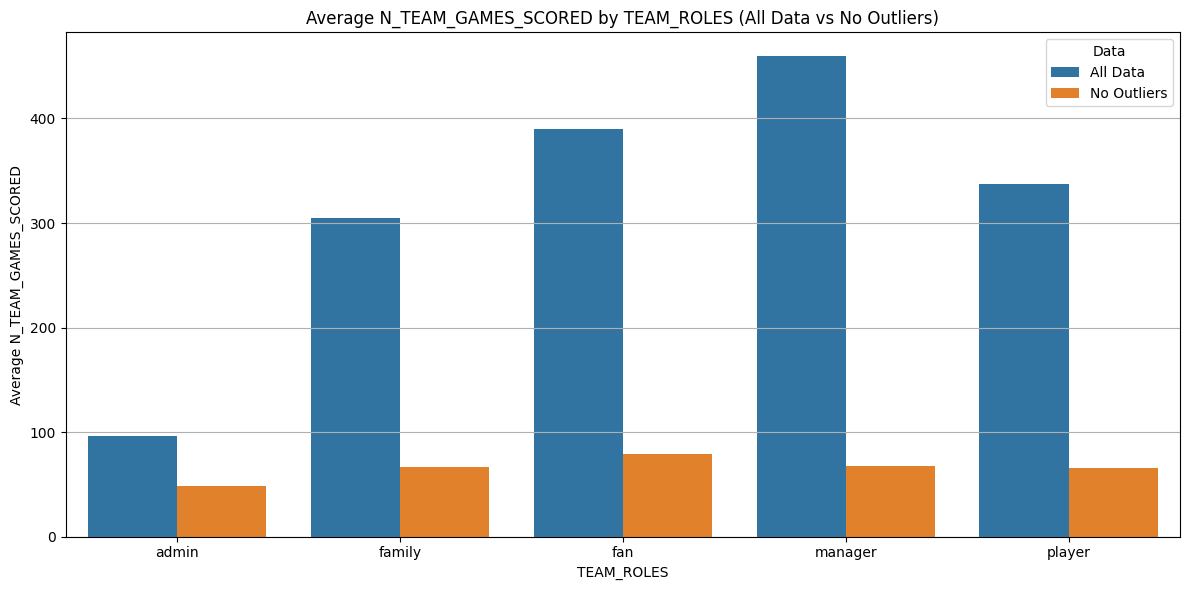

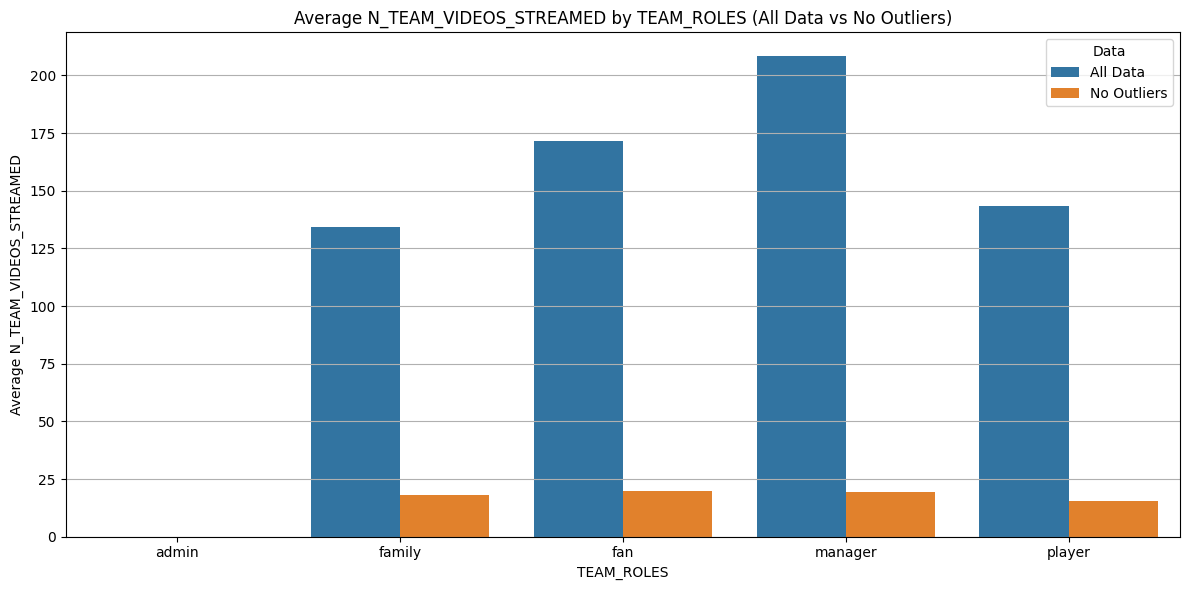

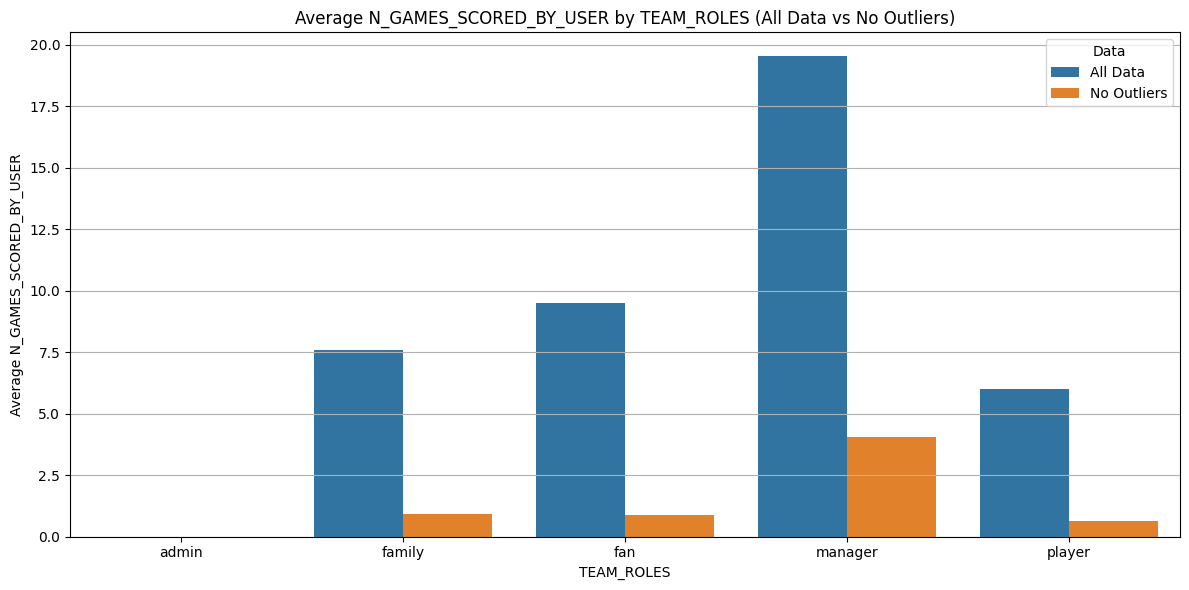

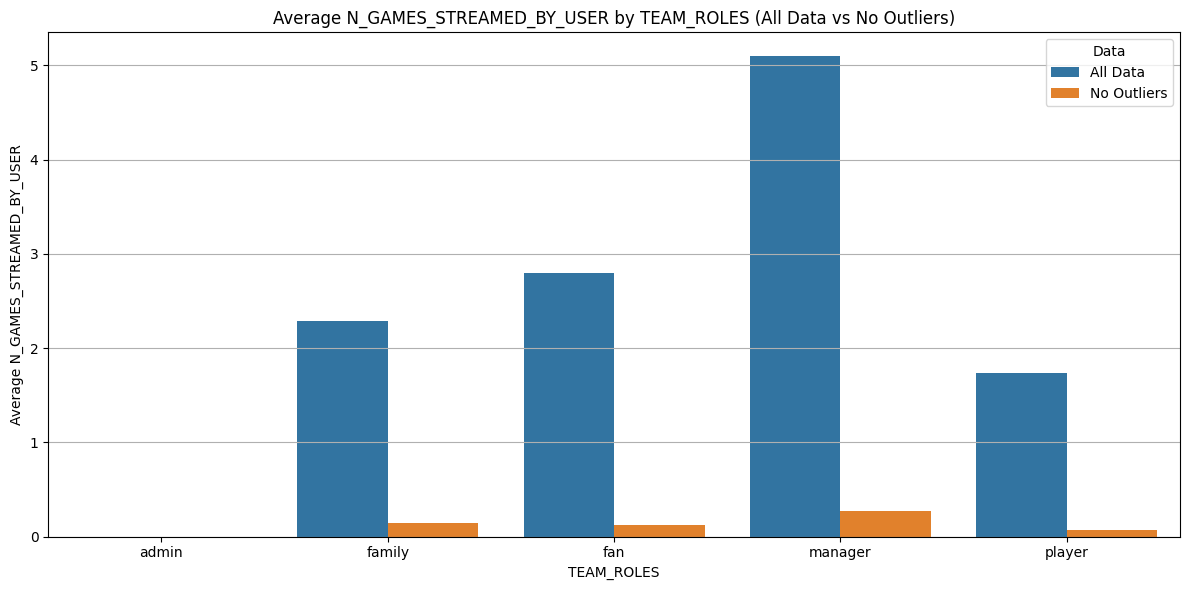

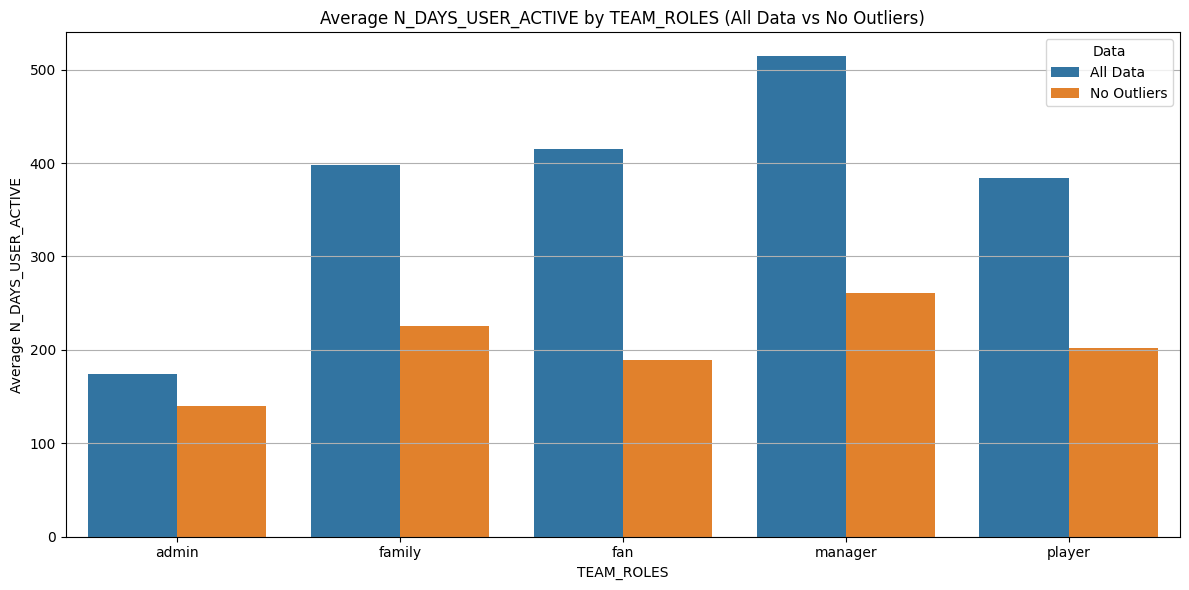

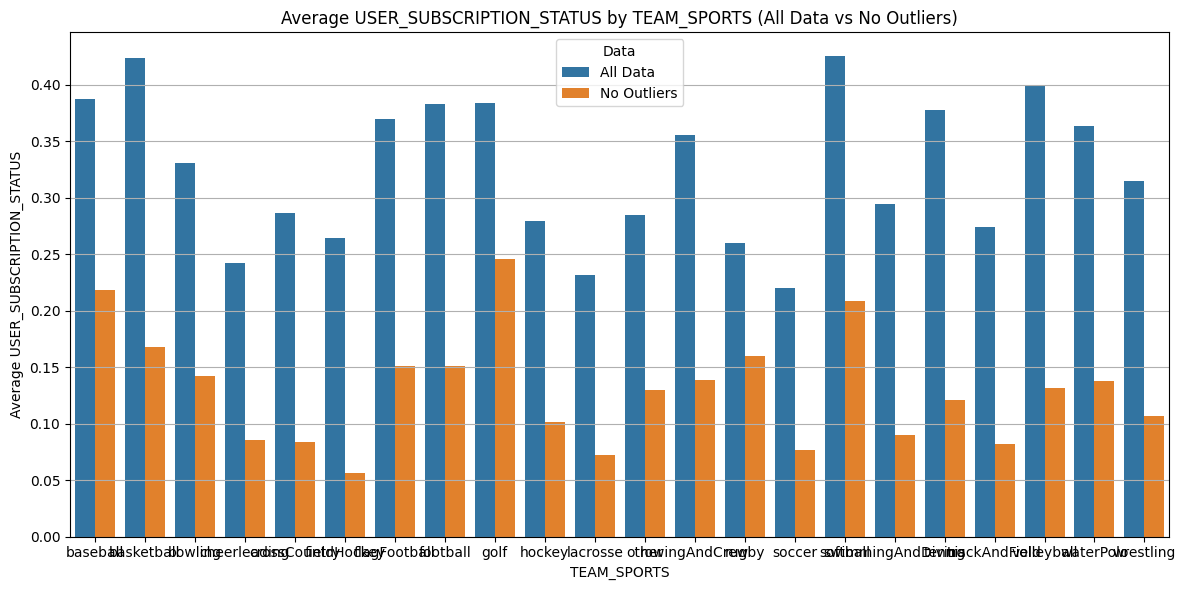

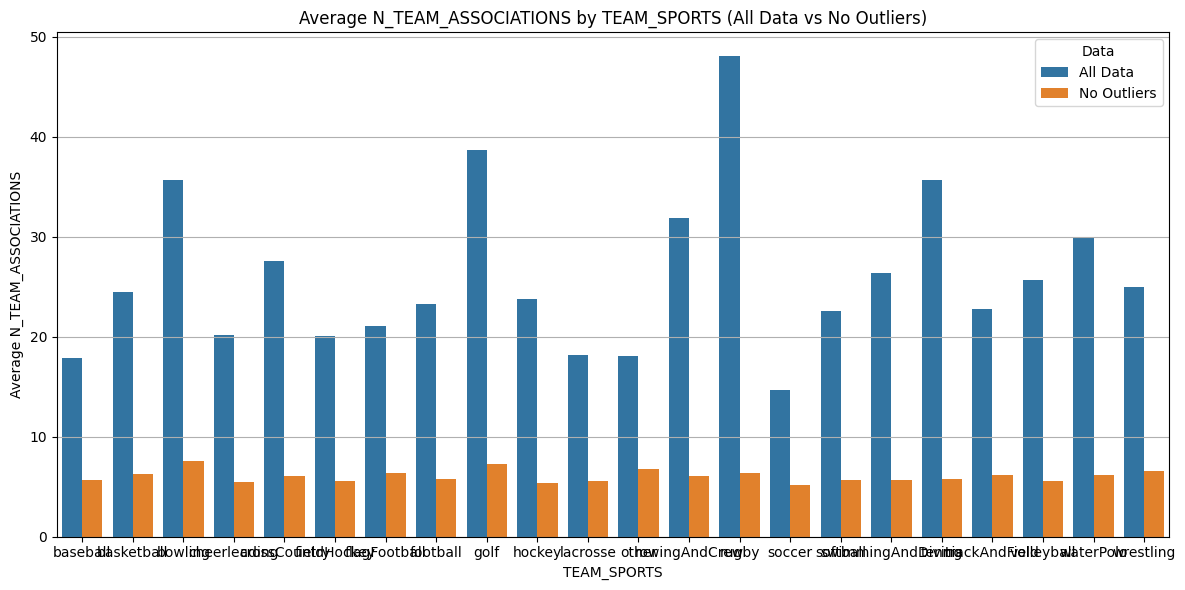

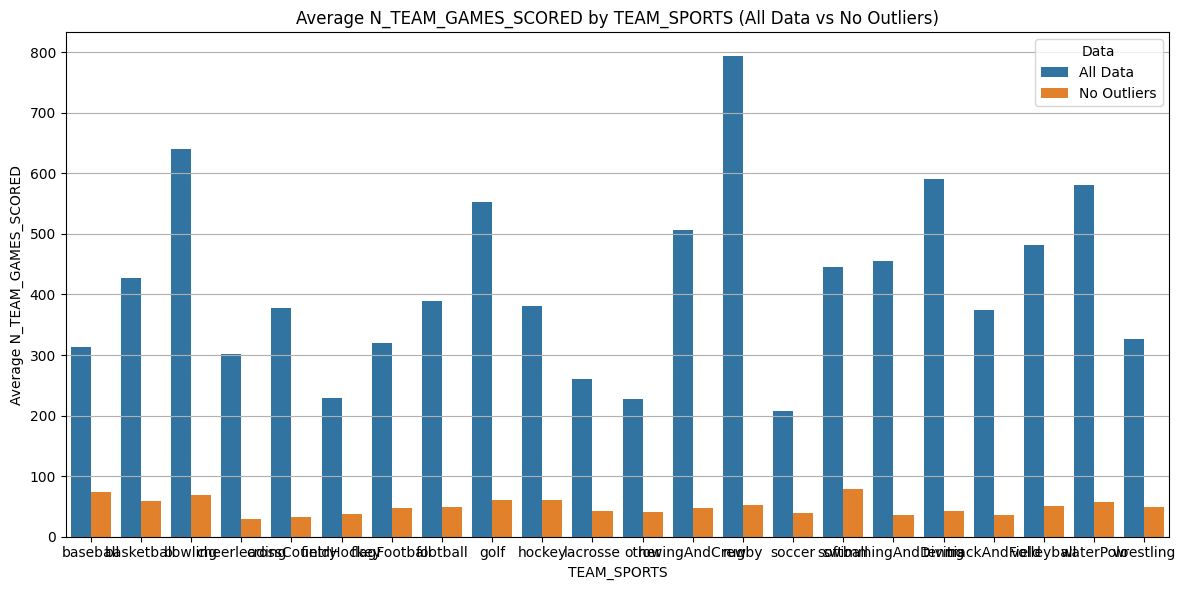

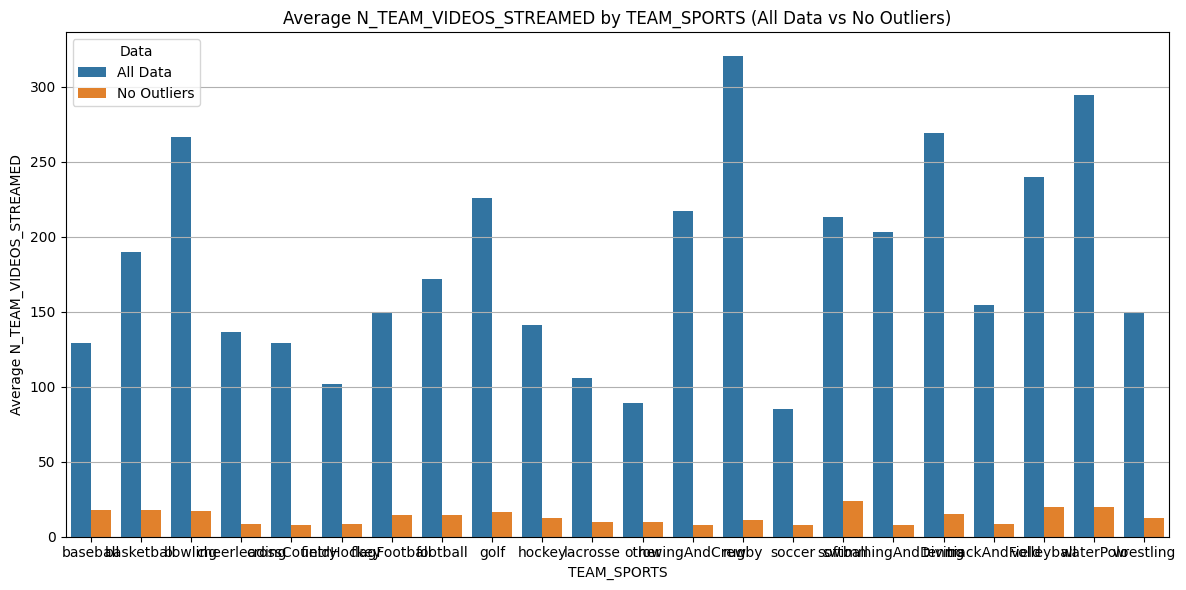

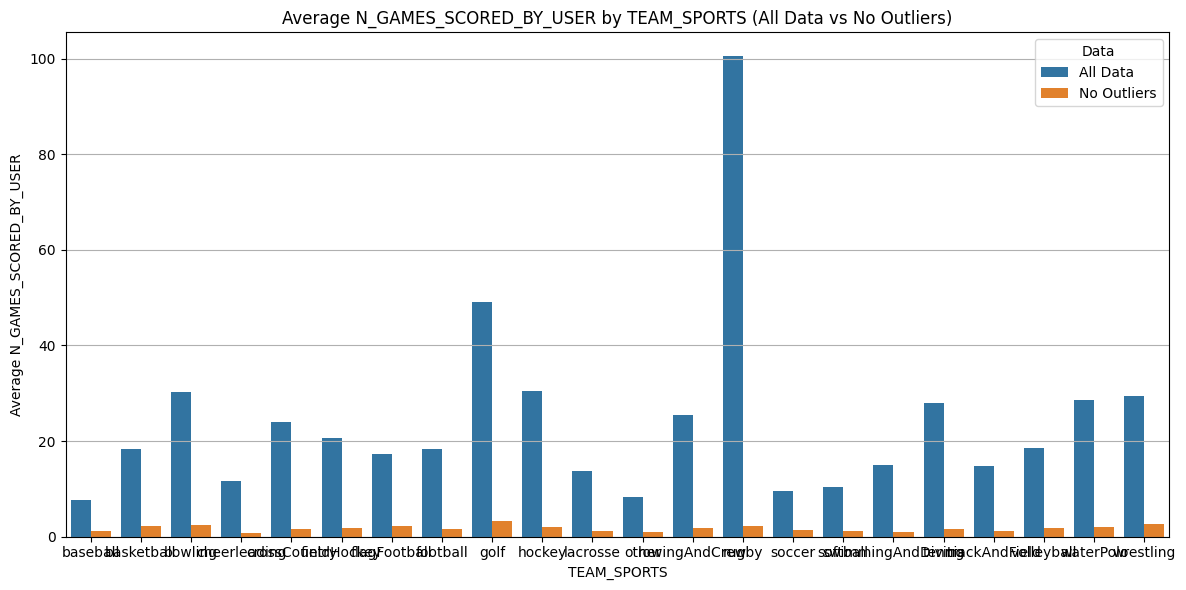

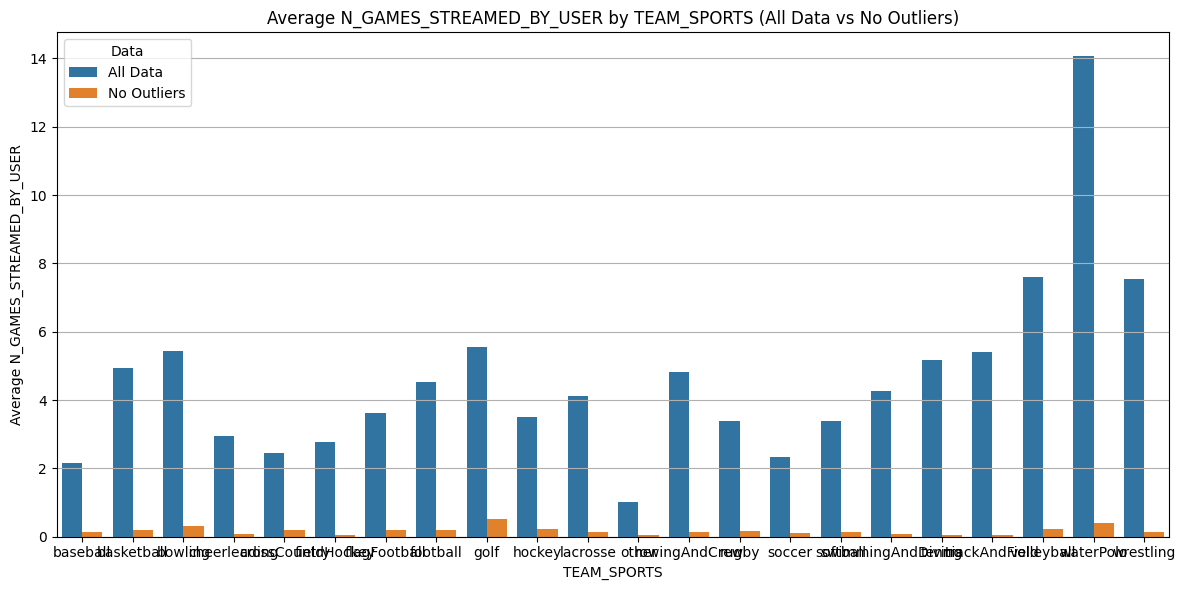

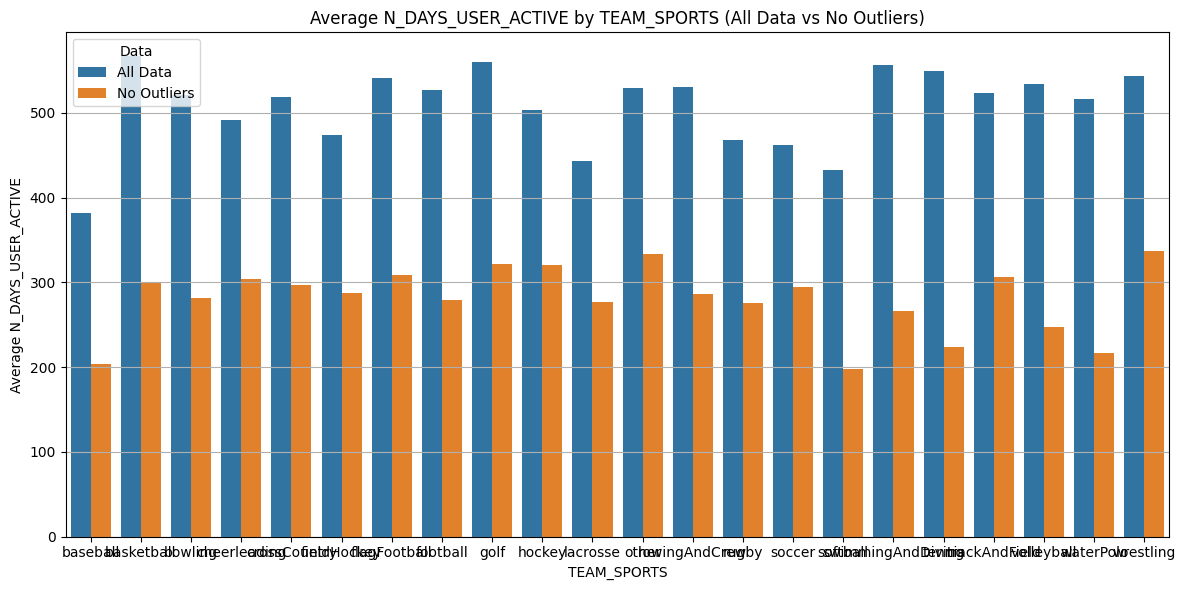

In [ ]:
# compare the average of the full dataset vs the no outliers dataset
for cat_col in list_cols:
    for num_col in full_num_cols:
        plot_category_avg_bar(cat_col, num_col)

Outliers are driving a difference in categories, all though it is small. Also all categories are differencated for our target variable.

In [ ]:
unique_list_cols = {}
for col in list_cols:
    uniques = [u for u in exploded_df[col].unique() if pd.notna(u)]
    unique_list_cols[col] = uniques
unique_list_cols

{'TEAM_AGE_GROUPS': ['Between 13 - 18', 'Under 13', 'Over 18'],
 'TEAM_COMPETITION_LEVELS': ['school', 'club_travel', 'recreational'],
 'TEAM_ROLES': ['family', 'fan', 'manager', 'admin', 'player'],
 'TEAM_SPORTS': ['baseball',
  'softball',
  'soccer',
  'fieldHockey',
  'basketball',
  'football',
  'volleyball',
  'flagFootball',
  'cheerleading',
  'hockey',
  'rugby',
  'lacrosse',
  'wrestling',
  'trackAndField',
  'other',
  'rowingAndCrew',
  'tennis',
  'golf',
  'swimmingAndDiving',
  'bowling',
  'crossCountry',
  'waterPolo']}

In [ ]:
# use the list items to create a binary column for each list item using the no outliers dataset
for col, items in unique_list_cols.items():
    for item in items:
        whole_no_outliers_df[f'{col}_{item}'] = whole_no_outliers_df[f'{col}'].apply(lambda x: 1 if item in x else 0)

print(whole_no_outliers_df.shape)
whole_no_outliers_df.head()

(421880, 50)


,USER_SUBSCRIPTION_STATUS,N_TEAM_ASSOCIATIONS,TEAM_AGE_GROUPS,TEAM_COMPETITION_LEVELS,TEAM_ROLES,TEAM_SPORTS,N_TEAM_GAMES_SCORED,N_TEAM_VIDEOS_STREAMED,N_GAMES_SCORED_BY_USER,N_GAMES_STREAMED_BY_USER,...,TEAM_SPORTS_wrestling,TEAM_SPORTS_trackAndField,TEAM_SPORTS_other,TEAM_SPORTS_rowingAndCrew,TEAM_SPORTS_tennis,TEAM_SPORTS_golf,TEAM_SPORTS_swimmingAndDiving,TEAM_SPORTS_bowling,TEAM_SPORTS_crossCountry,TEAM_SPORTS_waterPolo
USER_ID,,,,,,,,,,,,,,,,,,,,,
2,0,0.0,[],[],[],[],0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0,2.0,['Between 13 - 18'],['club_travel'],"['fan', 'family']",['softball'],1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5,0,11.0,['Under 13'],['club_travel'],"['family', 'fan', 'admin']","['baseball', 'softball']",125.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
6,0,3.0,['Under 13'],['club_travel'],['family'],['softball'],30.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7,0,0.0,[],[],[],[],0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
power_user_cols = [col for col in whole_no_outliers_df.columns if '_POWER_USER' in col]

In [ ]:
# remove unneeded columns
stats_df = whole_no_outliers_df.drop(list_cols + power_user_cols, axis=1)
print(stats_df.shape)
stats_df.head()

(421880, 40)


,USER_SUBSCRIPTION_STATUS,N_TEAM_ASSOCIATIONS,N_TEAM_GAMES_SCORED,N_TEAM_VIDEOS_STREAMED,N_GAMES_SCORED_BY_USER,N_GAMES_STREAMED_BY_USER,N_DAYS_USER_ACTIVE,TEAM_AGE_GROUPS_Between 13 - 18,TEAM_AGE_GROUPS_Under 13,TEAM_AGE_GROUPS_Over 18,...,TEAM_SPORTS_wrestling,TEAM_SPORTS_trackAndField,TEAM_SPORTS_other,TEAM_SPORTS_rowingAndCrew,TEAM_SPORTS_tennis,TEAM_SPORTS_golf,TEAM_SPORTS_swimmingAndDiving,TEAM_SPORTS_bowling,TEAM_SPORTS_crossCountry,TEAM_SPORTS_waterPolo
USER_ID,,,,,,,,,,,,,,,,,,,,,
2,0,0.0,0.0,0.0,0.0,0.0,49.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,2.0,1.0,0.0,0.0,0.0,374.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,11.0,125.0,0.0,0.0,0.0,658.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,0,3.0,30.0,0.0,0.0,0.0,85.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0.0,0.0,0.0,0.0,0.0,8.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
stats_df.columns

Index(['USER_SUBSCRIPTION_STATUS', 'N_TEAM_ASSOCIATIONS',
       'N_TEAM_GAMES_SCORED', 'N_TEAM_VIDEOS_STREAMED',
       'N_GAMES_SCORED_BY_USER', 'N_GAMES_STREAMED_BY_USER',
       'N_DAYS_USER_ACTIVE', 'TEAM_AGE_GROUPS_Between 13 - 18',
       'TEAM_AGE_GROUPS_Under 13', 'TEAM_AGE_GROUPS_Over 18',
       'TEAM_COMPETITION_LEVELS_school', 'TEAM_COMPETITION_LEVELS_club_travel',
       'TEAM_COMPETITION_LEVELS_recreational', 'TEAM_ROLES_family',
       'TEAM_ROLES_fan', 'TEAM_ROLES_manager', 'TEAM_ROLES_admin',
       'TEAM_ROLES_player', 'TEAM_SPORTS_baseball', 'TEAM_SPORTS_softball',
       'TEAM_SPORTS_soccer', 'TEAM_SPORTS_fieldHockey',
       'TEAM_SPORTS_basketball', 'TEAM_SPORTS_football',
       'TEAM_SPORTS_volleyball', 'TEAM_SPORTS_flagFootball',
       'TEAM_SPORTS_cheerleading', 'TEAM_SPORTS_hockey', 'TEAM_SPORTS_rugby',
       'TEAM_SPORTS_lacrosse', 'TEAM_SPORTS_wrestling',
       'TEAM_SPORTS_trackAndField', 'TEAM_SPORTS_other',
       'TEAM_SPORTS_rowingAndCrew', 'TEAM_S

In [92]:
stats_df.describe()

,USER_SUBSCRIPTION_STATUS,N_TEAM_ASSOCIATIONS,N_TEAM_GAMES_SCORED,N_TEAM_VIDEOS_STREAMED,N_GAMES_SCORED_BY_USER,N_GAMES_STREAMED_BY_USER,N_DAYS_USER_ACTIVE,TEAM_AGE_GROUPS_Between 13 - 18,TEAM_AGE_GROUPS_Under 13,TEAM_AGE_GROUPS_Over 18,...,TEAM_SPORTS_wrestling,TEAM_SPORTS_trackAndField,TEAM_SPORTS_other,TEAM_SPORTS_rowingAndCrew,TEAM_SPORTS_tennis,TEAM_SPORTS_golf,TEAM_SPORTS_swimmingAndDiving,TEAM_SPORTS_bowling,TEAM_SPORTS_crossCountry,TEAM_SPORTS_waterPolo
count,421880.000000,421880.000000,421880.000000,421880.000000,421880.000000,421880.000000,421880.000000,421880.000000,421880.000000,421880.000000,...,421880.000000,421880.000000,421880.000000,421880.000000,421880.000000,421880.000000,421880.000000,421880.000000,421880.000000,421880.000000
mean,0.107478,2.858265,37.823564,9.774125,0.496378,0.067680,126.983460,0.415502,0.577660,0.053610,...,0.001828,0.001972,0.001816,0.000265,0.000766,0.000569,0.000851,0.000462,0.000801,0.000488
std,0.309721,2.760202,46.107464,19.986497,3.314391,0.489655,148.229929,0.492809,0.493933,0.225247,...,0.042711,0.044365,0.042572,0.016291,0.027659,0.023844,0.029159,0.021494,0.028294,0.022092
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,21.000000,0.000000,0.000000,0.000000,73.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,4.000000,58.000000,8.000000,0.000000,0.000000,176.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,13.000000,220.000000,98.000000,57.000000,11.000000,1052.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


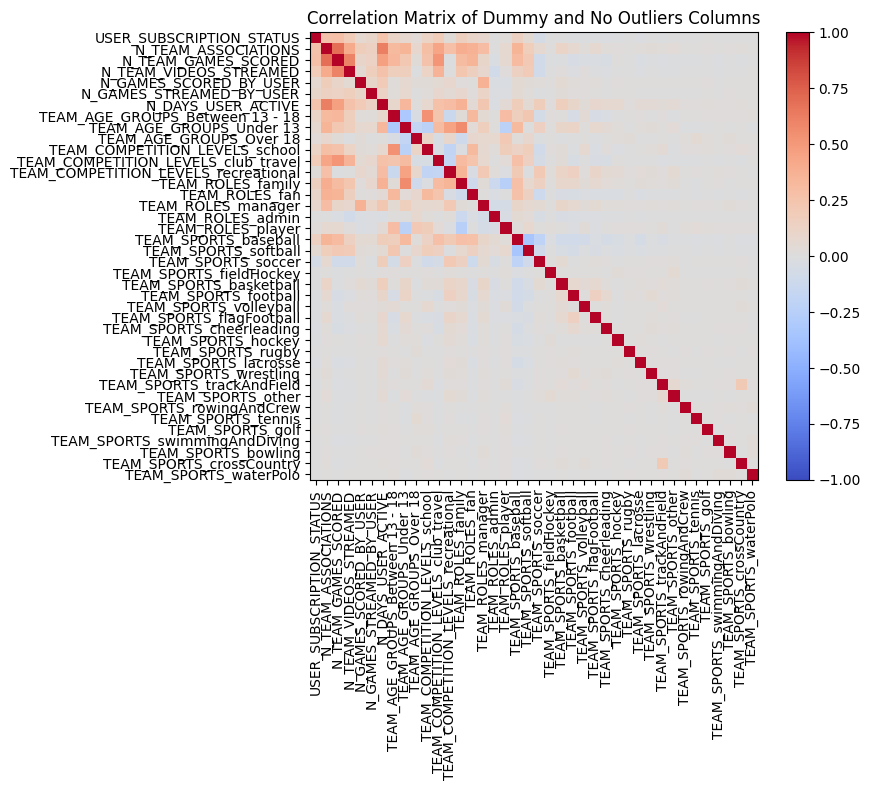

In [93]:
correlation_matrix(stats_df, 'Dummy and No Outliers')

Doesn't look there is much a relationship between our target variable and the sports variable.  These seems to be a small relationship between the other variables and the target. More powerful statistics will be needed.

## Save Data

In [94]:
stats_df.to_csv('stats_df.csv')